# Image Classification with Transfer Learning using Tensorflow

## Classifying Pokemons - Generation 1

In [79]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Conv2D, MaxPool2D

In [34]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2500)])
  except RuntimeError as e:
    print(e)

Download the image data: https://www.kaggle.com/lantian773030/pokemonclassification

In [35]:
data_dir='PokemonData/'
img_height = 256
img_width = 256
batch_size = 32

In [36]:
datagen = ImageDataGenerator(validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 5511 images belonging to 150 classes.
Found 1309 images belonging to 150 classes.


In [37]:
train_steps = train_generator.samples//batch_size
validation_steps = validation_generator.samples//batch_size

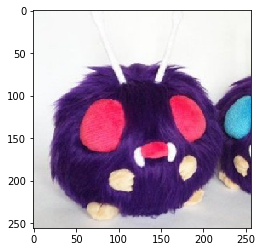

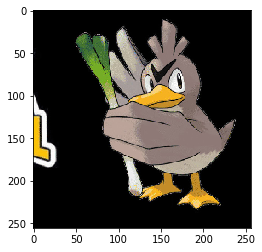

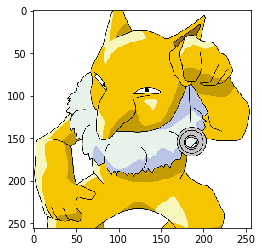

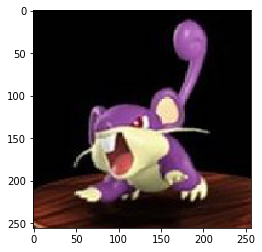

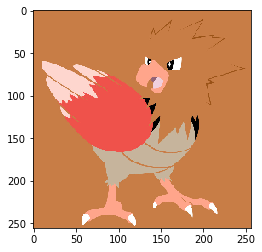

In [42]:
sample_x,sample_y = next(train_generator)
for x,y in zip(sample_x[:5],sample_y[:5]):
    plt.imshow(x.astype('int'))
    plt.show()

## Create a CNN from scratch

In [99]:
datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 5511 images belonging to 150 classes.
Found 1309 images belonging to 150 classes.


In [100]:
model = Sequential([
    Conv2D(32,(3,3),input_shape=(256,256,3)),
    MaxPool2D(),
    Conv2D(64,(3,3)),
    MaxPool2D(),
    Conv2D(128,(3,3)),
    MaxPool2D(),
    Conv2D(256,(3,3)),
    MaxPool2D(),
    Conv2D(512,(3,3)),
    MaxPool2D(),
    Conv2D(1024,(3,3)),
    MaxPool2D(),
    GlobalAveragePooling2D(),
    Dense(150,activation='softmax')
])


In [101]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 256)      

In [102]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [103]:
model.fit(train_generator,validation_data=validation_generator,epochs=25,steps_per_epoch=train_steps,validation_steps=validation_steps)

Epoch 1/25
172/172 [==============================] - 32s 184ms/step - loss: 5.0842 - accuracy: 0.0509 - val_loss: 3.7990 - val_accuracy: 0.1266
Epoch 2/25
172/172 [==============================] - 33s 191ms/step - loss: 3.6072 - accuracy: 0.1571 - val_loss: 3.4382 - val_accuracy: 0.1828
Epoch 3/25
172/172 [==============================] - 33s 193ms/step - loss: 2.9053 - accuracy: 0.2940 - val_loss: 2.5657 - val_accuracy: 0.3516
Epoch 4/25
172/172 [==============================] - 33s 194ms/step - loss: 2.2618 - accuracy: 0.4435 - val_loss: 2.3075 - val_accuracy: 0.4320
Epoch 5/25
172/172 [==============================] - 34s 198ms/step - loss: 1.7396 - accuracy: 0.5674 - val_loss: 2.2720 - val_accuracy: 0.4805
Epoch 6/25
172/172 [==============================] - 35s 204ms/step - loss: 1.2308 - accuracy: 0.6833 - val_loss: 2.1731 - val_accuracy: 0.4867
Epoch 7/25
172/172 [==============================] - 36s 210ms/step - loss: 0.9066 - accuracy: 0.7655 - val_loss: 2.4137 - val_ac

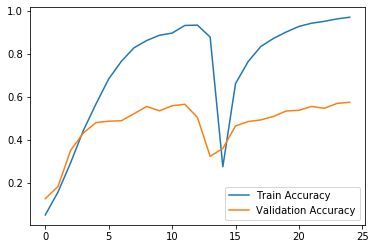

In [104]:
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## MobileNet - Only Final Layers Trainable

In [ ]:
datagen = ImageDataGenerator(validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

In [43]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

In [44]:
mobile_model = MobileNet(include_top=False,input_shape=(256,256,3))

In [45]:
for layer in mobile_model.layers:
    layer.trainable=False

In [46]:
mobile_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 257, 257, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 128, 128, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 128, 128, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 128, 128, 32

In [47]:
inputs = tf.keras.Input(shape=(256, 256, 3))
x = preprocess_input(inputs)
x = mobile_model(x,training=False)
x = GlobalAveragePooling2D()(x)
output = Dense(150,activation='softmax')(x)

In [48]:
model = Model(inputs=inputs,outputs=output)

In [49]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv_3 (Tenso [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub_3 (TensorFlo [(None, 256, 256, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Model)   (None, 8, 8, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               153750    
Total params: 3,382,614
Trainable params: 153,750
Non-trainable params: 3,228,864
___________________________________________

In [50]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
model.fit(train_generator,validation_data=validation_generator,epochs=10,steps_per_epoch=train_steps,validation_steps=validation_steps)

Epoch 1/10
172/172 [==============================] - 28s 164ms/step - loss: 3.5056 - accuracy: 0.3137 - val_loss: 1.9846 - val_accuracy: 0.6180
Epoch 2/10
172/172 [==============================] - 29s 167ms/step - loss: 1.1814 - accuracy: 0.8087 - val_loss: 1.2394 - val_accuracy: 0.7633
Epoch 3/10
172/172 [==============================] - 28s 162ms/step - loss: 0.5987 - accuracy: 0.9166 - val_loss: 0.9867 - val_accuracy: 0.8062
Epoch 4/10
172/172 [==============================] - 29s 168ms/step - loss: 0.3616 - accuracy: 0.9604 - val_loss: 0.8548 - val_accuracy: 0.8211
Epoch 5/10
172/172 [==============================] - 30s 174ms/step - loss: 0.2320 - accuracy: 0.9825 - val_loss: 0.7519 - val_accuracy: 0.8406
Epoch 6/10
172/172 [==============================] - 29s 171ms/step - loss: 0.1574 - accuracy: 0.9922 - val_loss: 0.7179 - val_accuracy: 0.8398
Epoch 7/10
172/172 [==============================] - 30s 177ms/step - loss: 0.1135 - accuracy: 0.9960 - val_loss: 0.7058 - val_ac

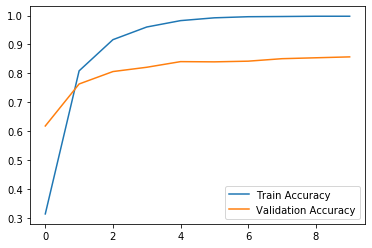

In [52]:
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## MobileNet - Only freeze 95% of layers

In [53]:
mobile_model = MobileNet(include_top=False,input_shape=(256,256,3))
from tensorflow.keras.applications.mobilenet import preprocess_input

In [54]:
percentage_freeze = 0.95

for layer in mobile_model.layers[:int(np.floor(len(mobile_model.layers)*percentage_freeze))]:
    layer.trainable=False

In [55]:
mobile_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 257, 257, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 128, 128, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 128, 128, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 128, 128, 32

In [56]:
inputs = tf.keras.Input(shape=(256, 256, 3))
x = preprocess_input(inputs)
x = mobile_model(x,training=False)
x = GlobalAveragePooling2D()(x)
output = Dense(150,activation='softmax')(x)

In [57]:
model = Model(inputs=inputs,outputs=output)

In [58]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv_4 (Tenso [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub_4 (TensorFlo [(None, 256, 256, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Model)   (None, 8, 8, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               153750    
Total params: 3,382,614
Trainable params: 1,206,422
Non-trainable params: 2,176,192
_________________________________________

In [59]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
model.fit(train_generator,validation_data=validation_generator,epochs=25,steps_per_epoch=train_steps,validation_steps=validation_steps)

Epoch 1/25
172/172 [==============================] - 30s 172ms/step - loss: 5.2835 - accuracy: 0.0288 - val_loss: 4.5835 - val_accuracy: 0.1023
Epoch 2/25
172/172 [==============================] - 28s 161ms/step - loss: 3.8815 - accuracy: 0.1827 - val_loss: 3.2895 - val_accuracy: 0.2852
Epoch 3/25
172/172 [==============================] - 29s 169ms/step - loss: 2.6749 - accuracy: 0.4220 - val_loss: 2.3940 - val_accuracy: 0.4500
Epoch 4/25
172/172 [==============================] - 29s 171ms/step - loss: 1.8391 - accuracy: 0.5963 - val_loss: 1.7757 - val_accuracy: 0.5891
Epoch 5/25
172/172 [==============================] - 29s 171ms/step - loss: 1.3477 - accuracy: 0.7098 - val_loss: 1.4498 - val_accuracy: 0.6797
Epoch 6/25
172/172 [==============================] - 30s 175ms/step - loss: 1.0602 - accuracy: 0.7717 - val_loss: 1.2122 - val_accuracy: 0.7211
Epoch 7/25
172/172 [==============================] - 30s 177ms/step - loss: 0.8135 - accuracy: 0.8272 - val_loss: 1.0581 - val_ac

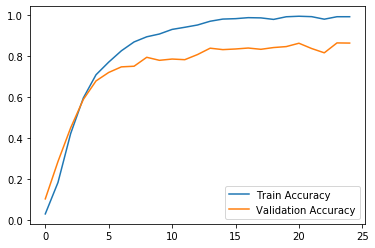

In [61]:
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## Data Augmentation

### Data Augmentation using ImageDataGenerator

In [62]:
datagen = ImageDataGenerator(validation_split=0.2,
                             horizontal_flip=True,
                             rotation_range=45,
                             shear_range=0.2,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 5511 images belonging to 150 classes.
Found 1309 images belonging to 150 classes.


In [63]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

In [64]:
mobile_model = MobileNet(include_top=False,input_shape=(256,256,3))

In [65]:
for layer in mobile_model.layers:
    layer.trainable=False

In [66]:
inputs = tf.keras.Input(shape=(256, 256, 3))
x = preprocess_input(inputs)
x = mobile_model(x,training=False)
x = GlobalAveragePooling2D()(x)
output = Dense(150,activation='softmax')(x)

In [67]:
model = Model(inputs=inputs,outputs=output)

In [68]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv_5 (Tenso [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub_5 (TensorFlo [(None, 256, 256, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Model)   (None, 8, 8, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               153750    
Total params: 3,382,614
Trainable params: 153,750
Non-trainable params: 3,228,864
___________________________________________

In [69]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [70]:
model.fit(train_generator,validation_data=validation_generator,epochs=15,steps_per_epoch=train_steps,validation_steps=validation_steps)

Epoch 1/15
172/172 [==============================] - 88s 511ms/step - loss: 3.9698 - accuracy: 0.2128 - val_loss: 2.5920 - val_accuracy: 0.4922
Epoch 2/15
172/172 [==============================] - 92s 538ms/step - loss: 1.8233 - accuracy: 0.6499 - val_loss: 1.6751 - val_accuracy: 0.6547
Epoch 3/15
172/172 [==============================] - 94s 547ms/step - loss: 1.1594 - accuracy: 0.7792 - val_loss: 1.3703 - val_accuracy: 0.6922
Epoch 4/15
172/172 [==============================] - 96s 558ms/step - loss: 0.8424 - accuracy: 0.8414 - val_loss: 1.2479 - val_accuracy: 0.7266
Epoch 5/15
172/172 [==============================] - 95s 555ms/step - loss: 0.6445 - accuracy: 0.8779 - val_loss: 1.0563 - val_accuracy: 0.7547
Epoch 6/15
172/172 [==============================] - 99s 574ms/step - loss: 0.5308 - accuracy: 0.9005 - val_loss: 0.9720 - val_accuracy: 0.7828
Epoch 7/15
172/172 [==============================] - 96s 556ms/step - loss: 0.4479 - accuracy: 0.9175 - val_loss: 0.9587 - val_ac

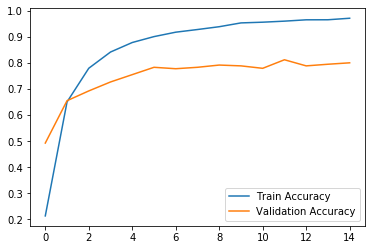

In [71]:
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

### Data Augmentation using preprocessing layers

In [72]:
datagen = ImageDataGenerator(validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 5511 images belonging to 150 classes.
Found 1309 images belonging to 150 classes.


In [73]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

In [74]:
mobile_model = MobileNet(include_top=False,input_shape=(256,256,3))

In [75]:
for layer in mobile_model.layers:
    layer.trainable=False

In [ ]:
inputs = tf.keras.Input(shape=(256, 256, 3))
x = tf.keras.
## input preprocessing layers

x = preprocess_input(x)
x = mobile_model(x,training=False)
x = GlobalAveragePooling2D()(x)
output = Dense(150,activation='softmax')(x)

In [ ]:
model = Model(inputs=inputs,outputs=output)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_generator,validation_data=validation_generator,epochs=15,steps_per_epoch=train_steps,validation_steps=validation_steps)

In [ ]:
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()